In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Loss vs dataset size

/tmp/ipykernel_27236/1571446166.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


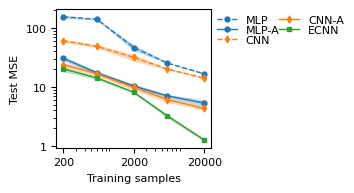

In [10]:
fig, ax = plt.subplots(1,1, figsize=(2, 1.8))

model_names = ["MLP", "MLP-A", "CNN", "CNN-A", "ECNN"]
training_samples = [200, 600, 2000, 6000, 20000]

data = np.load("data_for_figures/loss_vs_dataset_size.npz")

for i, model_name in enumerate(model_names):
    mean = data[model_name][0]
    std  = data[model_name][1]
    ax.plot(
        training_samples, 
        mean, 
        ["C0o--", "C0o-", "C1d--", "C1d-", "C2s-"][i], markersize=3.5, linewidth=1,
        label=model_name
    )
    ax.fill_between(
        training_samples,
        mean-2*std, 
        mean+2*std, 
        color=["C0", "C0", "C1", "C1", "C2"][i], alpha=0.3, linewidth=0
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks((200, 2000, 20000), (200, 2000, 20000), fontsize=8)
ax.set_yticks((1e-3, 1e-2, 1e-1), (1, 10, 100), fontsize=8)
ax.set_xlabel("Training samples", fontsize=8)
ax.set_ylabel("Test MSE", fontsize=8)
ax.tick_params(labelsize=8)
ax.legend(ncols=2, loc="upper left", bbox_to_anchor=(1,1), borderpad=0, labelspacing=0, handlelength=1.8, fontsize=8, columnspacing=0, frameon=False)

fig.tight_layout()

# Translation equivariance

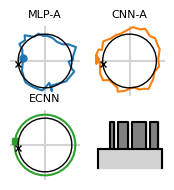

In [28]:
from grating.grating_simulator import visualize

data = np.load("data_for_figures/orbits.npz")

pattern = data["pattern"]
S_true = data["S_true"]
S_pred = {
    "MLP": data["S_pred_MLP"],
    "MLP-A": data["S_pred_MLP-A"],
    "CNN": data["S_pred_CNN"],
    "CNN-A": data["S_pred_CNN-A"],
    "ECNN": data["S_pred_ECNN"],
}

fig, axs = plt.subplots(2, 2, figsize=(2,2))
axs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]

element = 2
for i, model_name in enumerate(["MLP-A", "CNN-A", "ECNN"]):

    ax = axs[i]

    ax.axhline(0, c="lightgray")
    ax.axvline(0, c="lightgray")

    ax.plot(np.real(S_pred[model_name][:,element]), np.imag(S_pred[model_name][:,element]), ["C0-", "C1-", "C2-"][i], markersize=1, linewidth=1.5, alpha=[1,1,1][i])
    ax.plot(np.real(S_pred[model_name][0,element]), np.imag(S_pred[model_name][0,element]), ["C0o", "C1d", "C2s"][i], markersize=5)

    ax.plot(np.real(S_true[:,element]), np.imag(S_true[:,element]), "k-", linewidth=1, markersize=1)
    ax.plot(np.real(S_true[0,element]), np.imag(S_true[0,element]), "kx", markersize=5)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()

    limit = np.max(np.abs(S_true[:,element])) * 1.3
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_aspect(1)

    ax.set_title(model_name, fontsize=8)

visualize(axs[3], pattern)
axs[3].set_axis_off()

